# Correlation

## (1) 1D correlation

Nomalise pixels to have 0.5 standard deviation around 0.
After smoothing the filter, the muximum at peak 60 is the location of where the filter came from out of the signal.

So, __the highest value is exactly when the signal and filter match.__
Because both of signal and filters are normalised, or are sort of shifted about zero (some positive values and negative values), if one filter is laid over the image and multiplied and then summed up on them, the maximum value will be the matching location.
<img src="images/4/1D_correlation.png" width="700px">

## (2) 2D correlation
Using filters as templates of what we want to find in two dimensions.
<img src="images/4/2D_correlation1.png" width="500px">

This can actually be done through a normalized correlation. If the masked kernel template is taken and a normalised correlation with the image on the left is implemented, what is returned is a map or correlation image that looks like,
<img src="images/4/2D_correlation2.png" width="500px">

The most brightest area is the location of maximum matching value.

### Code

```python
Python: cv2.matchTemplate(image, templ, method[, result]) → result
```

Parameters:	
- __image:__ Image where the search is running. It must be 8-bit or 32-bit floating-point.
- __templ:__ Searched template. It must be not greater than the source image and have the same data type.
- __result:__ Map of comparison results. It must be single-channel 32-bit floating-point. If image is  W \times H and templ is w \times h , then result is $(W-w+1) \times (H-h+1)$.
- __method:__ Parameter specifying the comparison method (see below).

    - __method=CV_TM_SQDIFF:__
    $R(x,y)= \sum _{x',y'} (T(x',y')-I(x+x',y+y'))^2\\$

    - __method=CV_TM_SQDIFF_NORMED:__
    $R(x,y)= \frac{\sum_{x',y'} (T(x',y')-I(x+x',y+y'))^2}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}\\$

    - __method=CV_TM_CCORR:__
    $R(x,y)= \sum _{x',y'} (T(x',y')  \cdot I(x+x',y+y'))\\$

    - __method=CV_TM_CCORR_NORMED:__
    $R(x,y)= \frac{\sum_{x',y'} (T(x',y') \cdot I(x+x',y+y'))}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}\\$

    - __method=CV_TM_CCOEFF:__
    $R(x,y)= \sum _{x',y'} (T'(x',y')  \cdot I'(x+x',y+y'))$
    
    where
    
    $\begin{array}{l} T'(x',y')=T(x',y') - 1/(w  \cdot h)  \cdot \sum _{x'',y''} T(x'',y'') \\ I'(x+x',y+y')=I(x+x',y+y') - 1/(w  \cdot h)  \cdot \sum _{x'',y''} I(x+x'',y+y'') \end{array}\\$

    - __method=CV_TM_CCOEFF_NORMED:__
    $R(x,y)= \frac{ \sum_{x',y'} (T'(x',y') \cdot I'(x+x',y+y')) }{ \sqrt{\sum_{x',y'}T'(x',y')^2 \cdot \sum_{x',y'} I'(x+x',y+y')^2} }$

 -  cv2.TM_CCOEFF


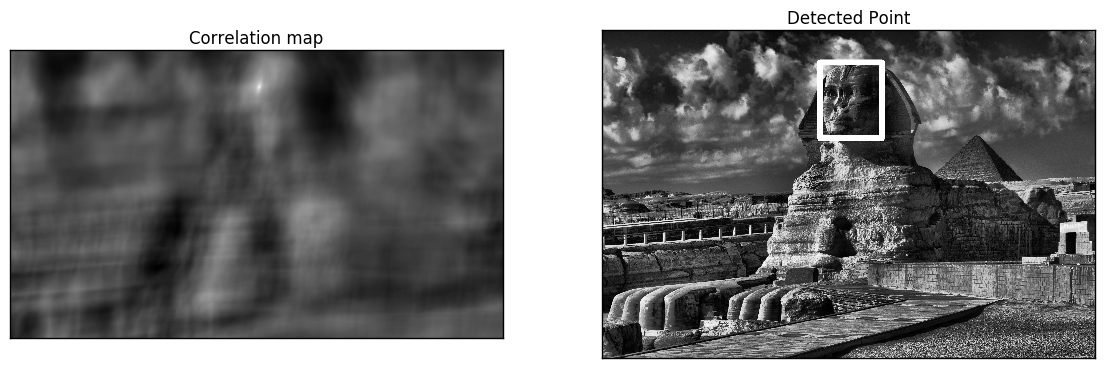

 -  cv2.TM_CCOEFF_NORMED


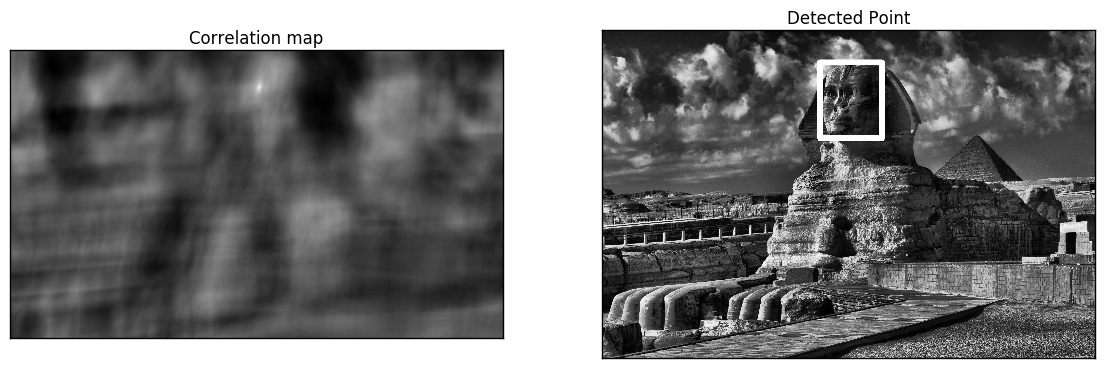

 -  cv2.TM_CCORR


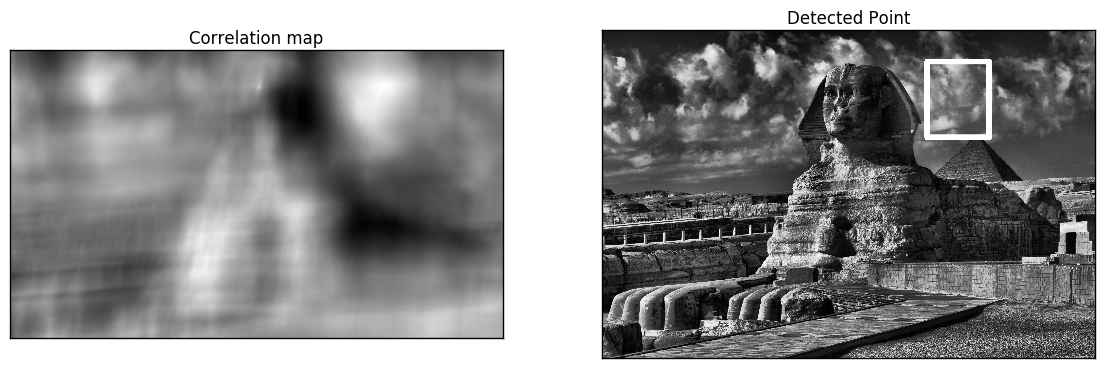

 -  cv2.TM_CCORR_NORMED


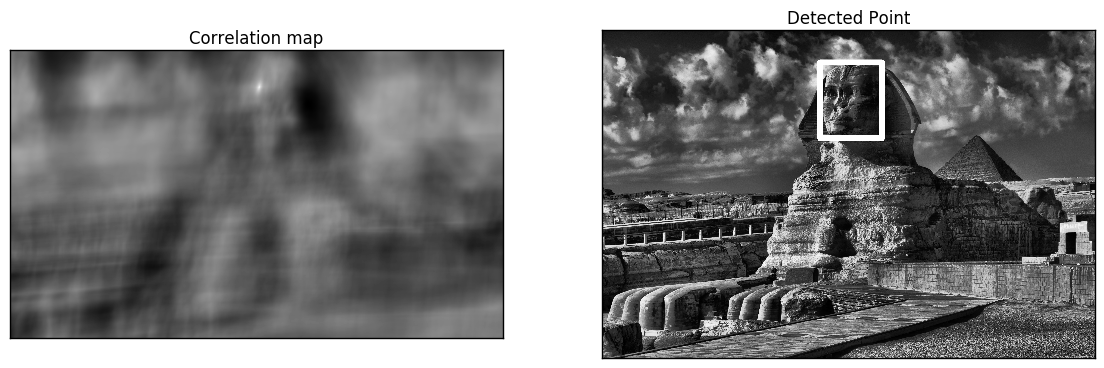

 -  cv2.TM_SQDIFF


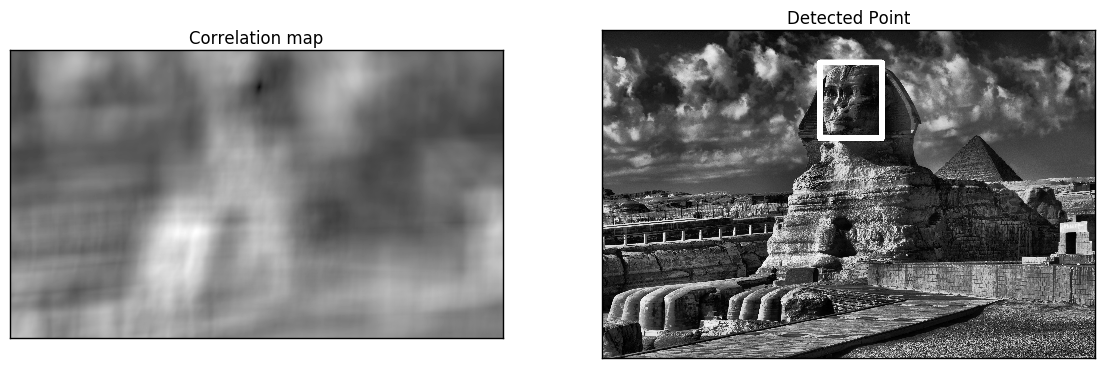

 -  cv2.TM_SQDIFF_NORMED


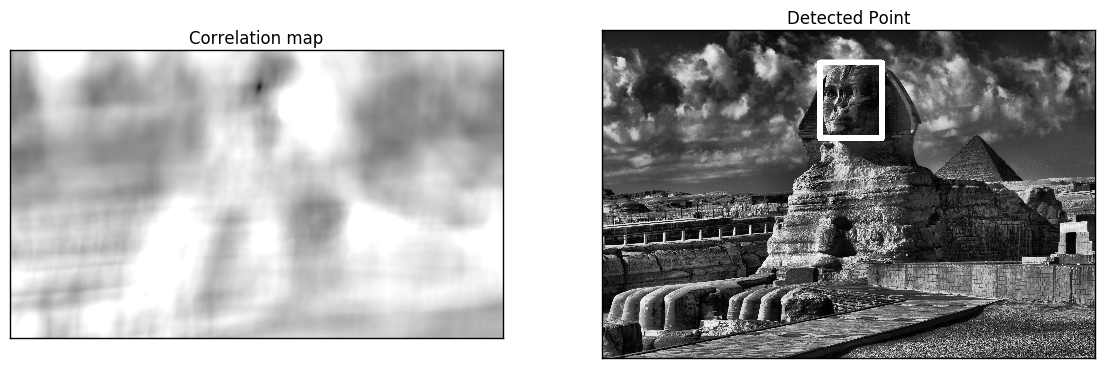

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

signals = [-1, 0, 0, 1, 1, 1, 0, -1, -1, 0, 1, 0, 0, -1]
flt = [1, 1, 0]
index = np.linspace(1, len(signals), len(signals))-1

img = cv2.imread('images/4/sphinx.jpg',cv2.IMREAD_GRAYSCALE)
img2 = img.copy()
template = cv2.imread('images/4/sphinx_template.png',cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
# print(template.shape, template.shape[::-1])

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    ## Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    ## If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, 255, 50)

    print(" - ", meth)
    fig, axis = plt.subplots(1, 2, figsize=(14, 10))
    axis[0].imshow(res,cmap = 'gray')
    axis[0].set_title('Correlation map')
    axis[0].set_xticks([]), axis[0].set_yticks([])
    
    axis[1].imshow(img,cmap = 'gray')
    axis[1].set_title('Detected Point')
    axis[1].set_xticks([]), axis[1].set_yticks([])

    plt.show()